In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
DATASET_DIR = 'output_data_self_norm_1024'
BATCH_SIZE = 32
IMG_HEIGHT = 257
IMG_WIDTH = 3585
EPOCHS = 3

In [3]:
print("Загрузка обучающего набора данных")
train_dataset = tf.keras.utils.image_dataset_from_directory(
    f'{DATASET_DIR}/train',
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    label_mode='binary'
)

print("\nЗагрузка валидационного набора данных")
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    f'{DATASET_DIR}/validation',
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    label_mode='binary'
)

class_names = train_dataset.class_names
print(f"\nНайденные классы: {class_names}")

Загрузка обучающего набора данных
Found 336 files belonging to 2 classes.

Загрузка валидационного набора данных
Found 84 files belonging to 2 classes.

Найденные классы: ['defect', 'normal']


In [4]:
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [5]:
print("\nСоздание архитектуры сверточной нейронной сети (CNN)...")

model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    
    layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Dropout(0.2),

    layers.Flatten(), 
    layers.Dense(128, activation='relu'), 
    layers.Dense(1)
])


Создание архитектуры сверточной нейронной сети (CNN)...


In [6]:
print("Компиляция модели...")
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.summary()

Компиляция модели...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 257, 3585, 3)      0         
                                                                 
 conv2d (Conv2D)             (None, 257, 3585, 16)     448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 1792, 16)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 1792, 32)     4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 896, 32)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None,

In [ ]:

print("\nНачинаем обучение модели...")
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=EPOCHS
)


Начинаем обучение модели...
Epoch 1/3



Визуализация результатов обучения...


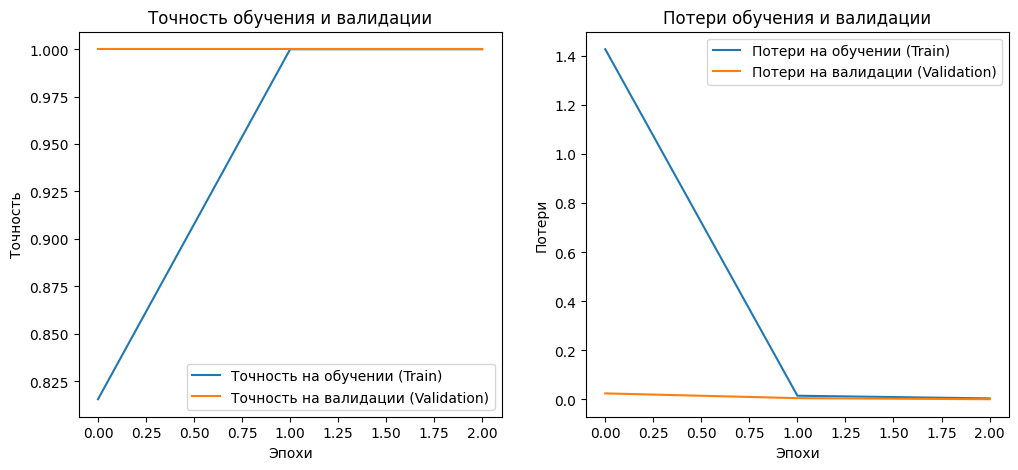

In [10]:
print("\nВизуализация результатов обучения...")

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Точность на обучении (Train)')
plt.plot(epochs_range, val_acc, label='Точность на валидации (Validation)')
plt.legend(loc='lower right')
plt.title('Точность обучения и валидации')
plt.xlabel('Эпохи')
plt.ylabel('Точность')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Потери на обучении (Train)')
plt.plot(epochs_range, val_loss, label='Потери на валидации (Validation)')
plt.legend(loc='upper right')
plt.title('Потери обучения и валидации')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.show()

In [ ]:
MODEL_SAVE_PATH = f'vibration_classifier_model_SELF_512_NORM_e{EPOCHS}.keras'
print(f"\nСохранение обученной модели в файл: {MODEL_SAVE_PATH}")
model.save(MODEL_SAVE_PATH)
print("Модель успешно сохранена.")


Сохранение обученной модели в файл: vibration_classifier_model_SELF_1024_NORM_e3.keras
Модель успешно сохранена.
